# **Sign Language Real-Time Video Detection Project**

***************************************
**Team ID**: C241-PS342

**ML Team**:

  1. Fira Areta Apsarini (M004D4KX2469)
  2. Nadhira Apta Maheswari (M004D4KX1449)
  3. Keysa Anadea Aqiva Ajie (M004D4KX2378)

## **1. Dataset**

This project utilizes a combined dataset to develop a comprehensive model for recognizing BISINDO sign language alphabets. The dataset consist  of BISINDO sign language alphabet photos that comprises from two main sources: self-collected photos by each Machine Learning team member, and we integrated our self-collected data with a dataset from Kaggle, available at https://www.kaggle.com/datasets/achmadnoer/alfabet-bisindo <br>
Our public dataset can be accessed at https://drive.google.com/file/d/1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9/view?usp=drive_link


## **2. Data Loading**

### 2.1 Install Spesific Tensorflow Version

In [ ]:
!pip install tensorflow==2.8.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.5/498.5 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.3


### 2.2 Import Libraries

In [ ]:
import keras
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import os
import gdown
import zipfile
import shutil
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from sklearn.model_selection import train_test_split

In [ ]:
from keras.applications.vgg19 import VGG19

### 2.3 Download Dataset

In [ ]:
# Download dataset file using gdown
gdown.download('https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9', '/content/data.zip', quiet=False)
# Extract the file zip
local_zip = '/content/data.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('dataset')

Downloading...
From (original): https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9
From (redirected): https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9&confirm=t&uuid=4f9e5c00-7709-4042-8dcc-ffa02a5bdc34
To: /content/data.zip
100%|██████████| 3.23G/3.23G [01:12<00:00, 44.3MB/s]


In [ ]:
# Path to the extracted dataset
dataset_path = 'dataset'
# Path to the organized dataset
organized_dataset_path = 'organized_dataset'

# Create a new directory for the organized dataset if it doesn't exist
os.makedirs(organized_dataset_path, exist_ok=True)

# Identify and move images to subfolders based on the first letter of the file name
for file_name in os.listdir(dataset_path):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        label = file_name[0]
        label_folder = os.path.join(organized_dataset_path, label)
        os.makedirs(label_folder, exist_ok=True)
        shutil.move(os.path.join(dataset_path, file_name), os.path.join(label_folder, file_name))

In [ ]:
# Directory paths for training and validation datasets
train_path = 'dataset/train'
val_path = 'dataset/validation'

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Create subfolders for each alphabet letter within the training and validation directories
for label in os.listdir(organized_dataset_path):
    os.makedirs(os.path.join(train_path, label), exist_ok=True)
    os.makedirs(os.path.join(val_path, label), exist_ok=True)

    file_names = os.listdir(os.path.join(organized_dataset_path, label))

    # Split the files into training and validation sets (80% training, 20% validation)
    train_files, val_files = train_test_split(file_names, test_size=0.2, random_state=42)

    for file_name in train_files:
        shutil.move(os.path.join(organized_dataset_path, label, file_name), os.path.join(train_path, label, file_name))
    for file_name in val_files:
        shutil.move(os.path.join(organized_dataset_path, label, file_name), os.path.join(val_path, label, file_name))

## **3. Data Pre-processing**

In [ ]:
# Create ImageDataGenerator objects for training and validation sets with rescaling
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


validation_split = 0.2

# Import and preprocess the training dataset
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (128, 128),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

# Import and preprocess the validation dataset
validation_set = validation_datagen.flow_from_directory('dataset/validation',
                                                 target_size = (128, 128),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

# Calculate the number of steps per epoch for training and validation
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size

validation_set.class_indices
# This will output the mapping of class labels to indices


Found 3108 images belonging to 26 classes.
Found 777 images belonging to 26 classes.


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

## **4. Modelling Using VGG-16**

In [ ]:
#RUN FOR VGG-16
IMAGE_SIZE = [128, 128] # Size of the input images

# Initialize the VGG16 model with pre-trained weights from ImageNet, excluding the top (fully connected) layers
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#Adding for custom layers
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(26, activation='softmax')(x) #initiation for number of maximal output dense
model = Model(inputs=vgg.input, outputs=prediction)


model.compile(loss='categorical_crossentropy', #categorical_crosentropy is for multilabel (over than 2 classes)
                    optimizer=tf.optimizers.Adam(0.001), #learning rate (estimation/itterate)
                    metrics=['accuracy'])
model.summary()

80150528/80134624 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

## **5. Re-Training**


In [ ]:
# Fit the model on the training data
model_fit = model.fit(training_set, epochs = 50,
                     validation_data = validation_set)

Epoch 1/50
3108/3108 [==============================] - 738s 237ms/step - loss: 3.7668 - accuracy: 0.2645 - val_loss: 2.0693 - val_accuracy: 0.5109
Epoch 2/50
3108/3108 [==============================] - 722s 232ms/step - loss: 1.6208 - accuracy: 0.6187 - val_loss: 3.0865 - val_accuracy: 0.4028
Epoch 3/50
3108/3108 [==============================] - 716s 230ms/step - loss: 1.2145 - accuracy: 0.7159 - val_loss: 2.5223 - val_accuracy: 0.5212
Epoch 4/50
3108/3108 [==============================] - 721s 232ms/step - loss: 0.8668 - accuracy: 0.7799 - val_loss: 3.2523 - val_accuracy: 0.5006
Epoch 5/50
3108/3108 [==============================] - 721s 232ms/step - loss: 0.6964 - accuracy: 0.8333 - val_loss: 2.4270 - val_accuracy: 0.5907
Epoch 6/50
3108/3108 [==============================] - 725s 233ms/step - loss: 0.6114 - accuracy: 0.8542 - val_loss: 2.6643 - val_accuracy: 0.5972
Epoch 7/50
3108/3108 [==============================] - 712s 229ms/step - loss: 0.4886 - accuracy: 0.8896 - val_

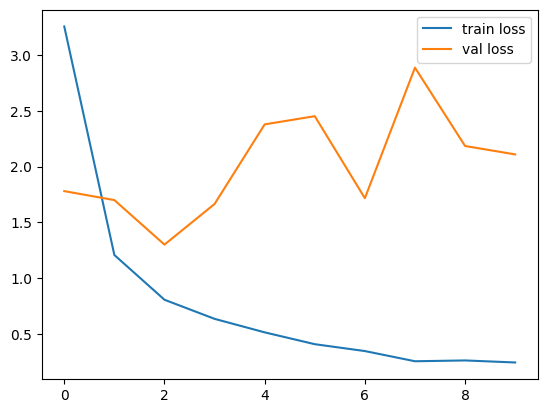

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation loss over the epochs
plt.plot(model_fit.history['loss'], '',label='train loss')
plt.plot(model_fit.history['val_loss'], '' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

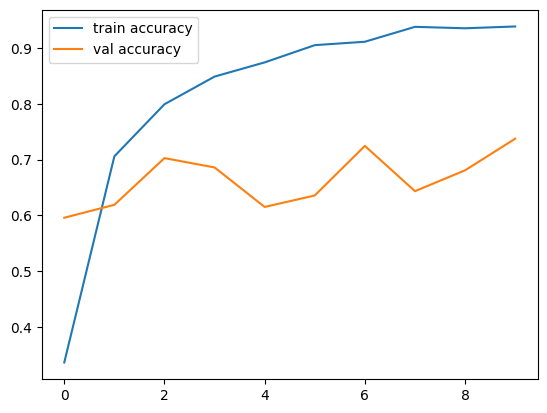

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation accuracy over the epochs
plt.plot(model_fit.history['accuracy'], '',label='train accuracy')
plt.plot(model_fit.history['val_accuracy'], '',label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## **6. Checking The Prediction**

Saving N (23).jpg to N (23).jpg
1/1 [==============================] - 1s 705ms/step


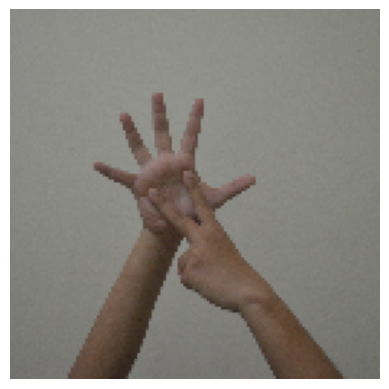

A: 0.00%
B: 0.00%
C: 0.00%
D: 0.00%
E: 0.00%
F: 0.00%
G: 0.00%
H: 0.00%
I: 0.00%
J: 0.00%
K: 0.00%
L: 0.00%
M: 0.00%
N: 100.00%
O: 0.00%
P: 0.00%
Q: 0.00%
R: 0.00%
S: 0.00%
T: 0.00%
U: 0.00%
V: 0.00%
W: 0.00%
X: 0.00%
Y: 0.00%
Z: 0.00%


In [ ]:
uploaded = files.upload()
labels = training_set.class_indices.keys()

for paths in uploaded.keys():
    path = paths
    img = image.load_img(path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    proba = model.predict(images)[0]

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    for (label, p) in zip(labels, proba):
        print("{}: {:.2f}%".format(label, p * 100))

import os
os.remove(path)

## **7. Export Model**

In [ ]:
model.save('modelVGG.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modelVGG.tflite', 'wb') as f:
    f.write(tflite_model)